### Actividad 2:

Bibliotecas



In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

Visualizar los datos

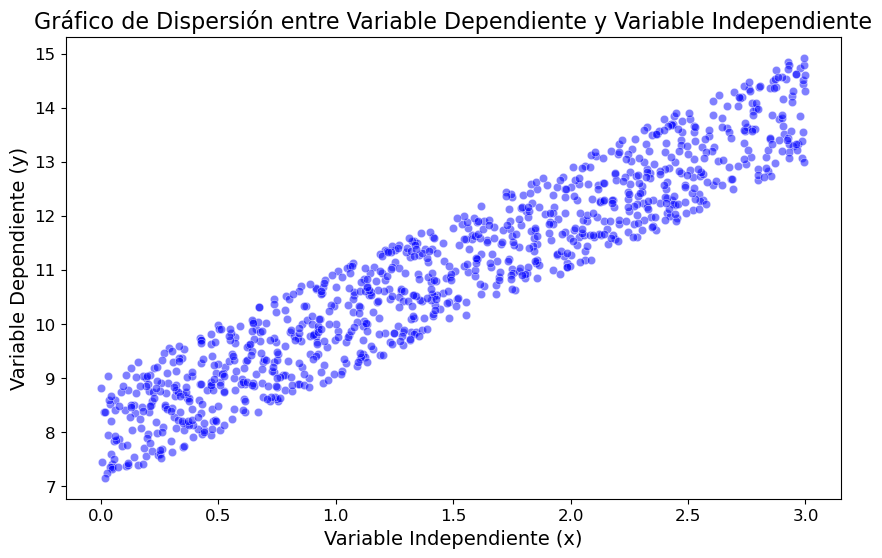

In [2]:
x = np.random.uniform(0, 3, 1000)
r = np.random.uniform(2, 4, 1000)
y = 5 + 2 * x + r

# Gráfico de dispersión entre x e y
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x, y=y, color='blue', alpha=0.5)
plt.title('Gráfico de Dispersión entre Variable Dependiente y Variable Independiente', fontsize=16)
plt.xlabel('Variable Independiente (x)', fontsize=14)
plt.ylabel('Variable Dependiente (y)', fontsize=14)
plt.tick_params(axis='both', labelsize=12)
plt.show()

Función para visualizar los datos

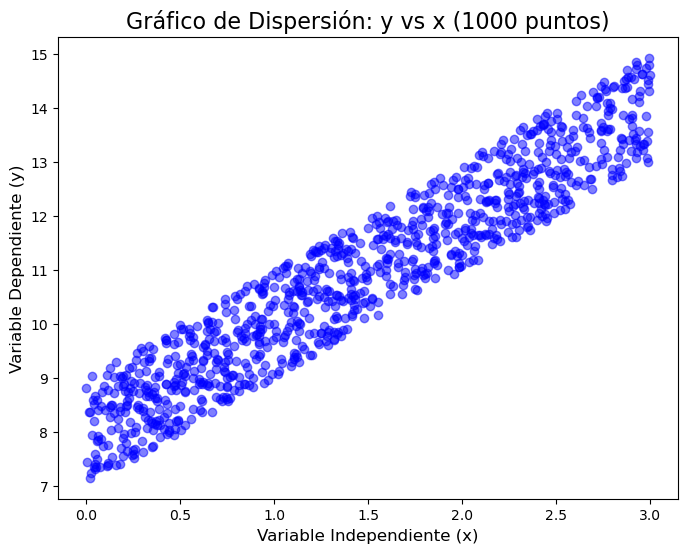

In [3]:
def visualizacion_datos(x, y, num_datos=1000, guardar_imagen=False, nombre_imagen='grafico.png'):
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, c='blue', alpha=0.5)
    plt.title(f'Gráfico de Dispersión: y vs x ({num_datos} puntos)', fontsize=16)
    plt.xlabel('Variable Independiente (x)', fontsize=12)
    plt.ylabel('Variable Dependiente (y)', fontsize=12)
    plt.tick_params(axis='both', labelsize=10)
    if guardar_imagen:
        plt.savefig(nombre_imagen, dpi=300) 
        print(f"Imagen guardada {nombre_imagen}")
    else:
        plt.show()

# Prueba de la función de visualización
visualizacion_datos(x, y)

Regresión lineal

In [4]:
def AjusteRegresionLineal(x, y):
    X = np.vstack([np.ones(len(x)), x]).T
    beta = np.linalg.inv(X.T @ X) @ X.T @ y
    return beta

# Ejecución del ajuste de regresión
np.random.seed(42)
x = np.random.uniform(0, 3, 1000)
y = 5 + 2 * x + np.random.uniform(2, 4, 1000)
beta = AjusteRegresionLineal(x, y)
print("Parámetros calculados (beta):", beta)

Parámetros calculados (beta): [7.98529095 2.01954327]


Graficar regresión lineal

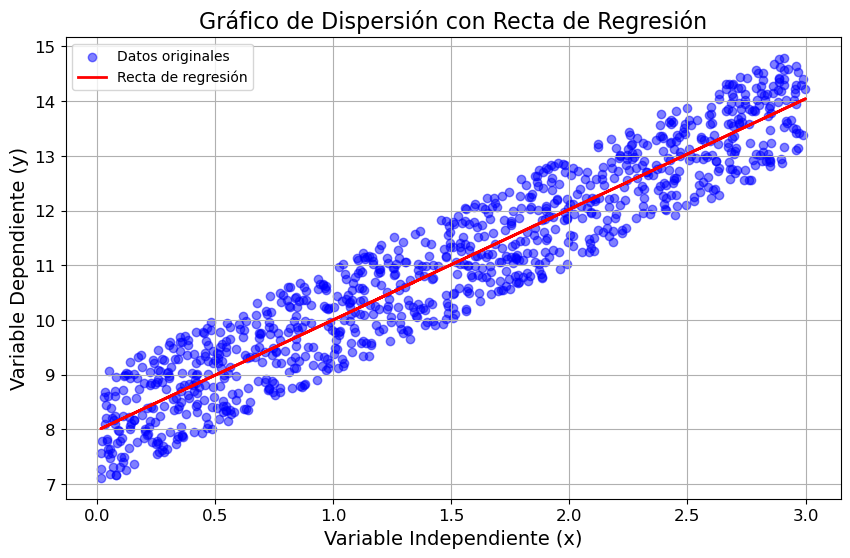

In [5]:
def graficar_regresion(x, y, beta_optimos):
    y_pred = beta_optimos[0] + beta_optimos[1] * x
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='blue', alpha=0.5, label='Datos originales')
    plt.plot(x, y_pred, color='red', label='Recta de regresión', linewidth=2)
    plt.title('Gráfico de Dispersión con Recta de Regresión', fontsize=16)
    plt.xlabel('Variable Independiente (x)', fontsize=14)
    plt.ylabel('Variable Dependiente (y)', fontsize=14)
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

# Graficar la regresión 
graficar_regresion(x, y, beta)

Clase regresión lineal

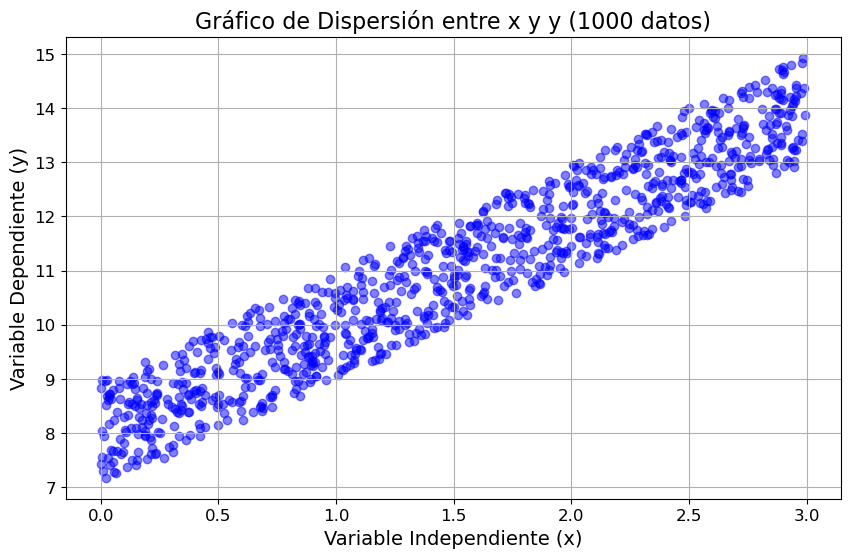

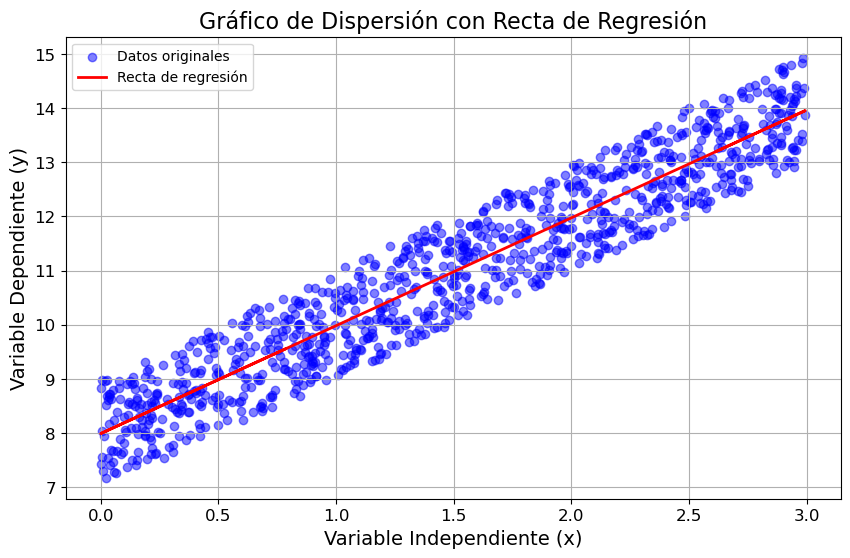

In [6]:
class regressionLineal:
    def __init__(self, tipo_datos, num_datos):
        self.tipo_datos = tipo_datos
        self.num_datos = num_datos
        self.x = np.random.uniform(0, 3, self.num_datos)
        self.ruido = np.random.uniform(2, 4, self.num_datos)
        self.y = 5 + 2 * self.x + self.ruido
    
    def visualizar_datos(self, guardar_imagen=False, nombre_imagen='grafico.png'):
        plt.figure(figsize=(10, 6))
        plt.scatter(self.x, self.y, color='blue', alpha=0.5)
        plt.title(f'Gráfico de Dispersión entre x y y ({self.num_datos} datos)', fontsize=16)
        plt.xlabel('Variable Independiente (x)', fontsize=14)
        plt.ylabel('Variable Dependiente (y)', fontsize=14)
        plt.tick_params(axis='both', which='major', labelsize=12)
        plt.grid(True)
        if guardar_imagen:
            plt.savefig(nombre_imagen)
        plt.show()

    def ajuste_regresion_lineal(self):
        X = np.c_[np.ones_like(self.x), self.x]
        beta = np.linalg.inv(X.T @ X) @ X.T @ self.y
        return beta
    
    def graficar_regresion(self):
        beta_optimos = self.ajuste_regresion_lineal()
        y_pred = beta_optimos[0] + beta_optimos[1] * self.x
        plt.figure(figsize=(10, 6))
        plt.scatter(self.x, self.y, color='blue', alpha=0.5, label='Datos originales')
        plt.plot(self.x, y_pred, color='red', label='Recta de regresión', linewidth=2)
        plt.title('Gráfico de Dispersión con Recta de Regresión', fontsize=16)
        plt.xlabel('Variable Independiente (x)', fontsize=14)
        plt.ylabel('Variable Dependiente (y)', fontsize=14)
        plt.tick_params(axis='both', which='major', labelsize=12)
        plt.legend()
        plt.grid(True)
        plt.show()

#Creación de prueba de métodos de visualización
modelo = regressionLineal(tipo_datos='simulado', num_datos=1000)
modelo.visualizar_datos()
modelo.graficar_regresion()


Cargar datos

In [7]:
file_path = 'measurements.csv'
data = pd.read_csv(file_path)

data.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


Realizar Copia - Convertir dato texto a número - Crear Gráfico de dispersión

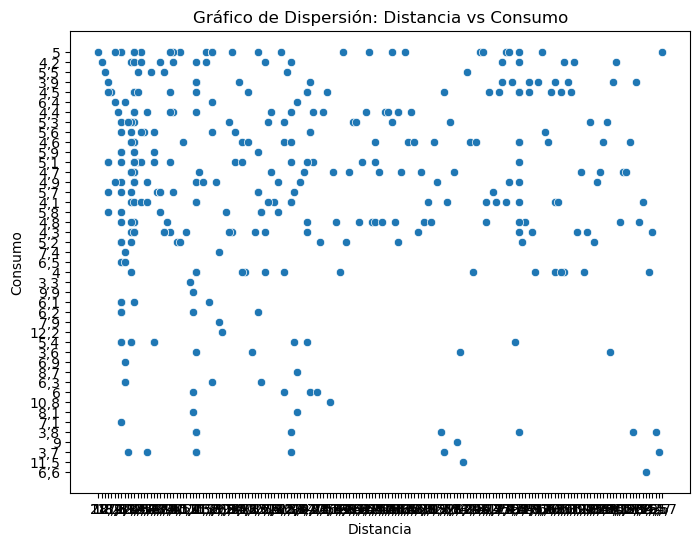

In [8]:
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.linear_model import LinearRegression

df_copy = data.copy() # Tuve que hacer una copia ya que al ejecutarlo de nuevo daba error al no encontrar los valores que eran String
df_copy['distance'] = df_copy['distance'].str.replace(',', '.').astype(float)
df_copy['consume'] = df_copy['consume'].str.replace(',', '.').astype(float)

X = df_copy[['distance']].values
y = df_copy['consume'].values
linear_model = LinearRegression()
linear_model.fit(X, y)
y_pred = linear_model.predict(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x='distance', y='consume', data=data)
plt.title('Gráfico de Dispersión: Distancia vs Consumo')
plt.xlabel('Distancia')
plt.ylabel('Consumo')
plt.show()

Se aplica Regresión lineal para saber el consumo de función a la distancia - transformación polinomial - visualizar error cuadrático

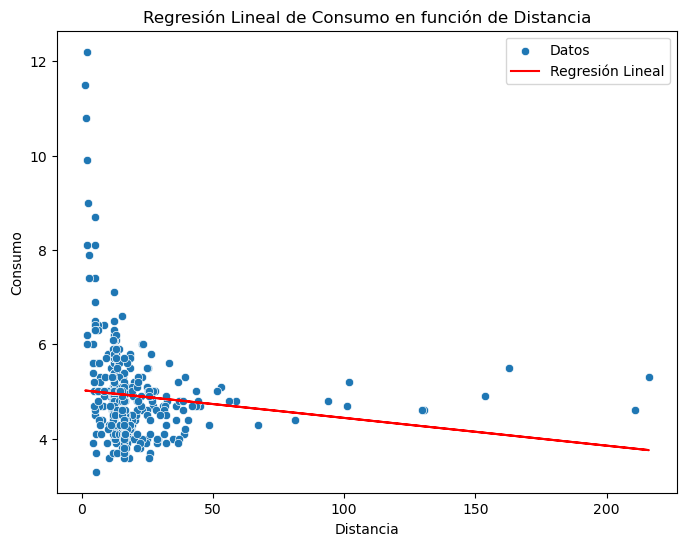

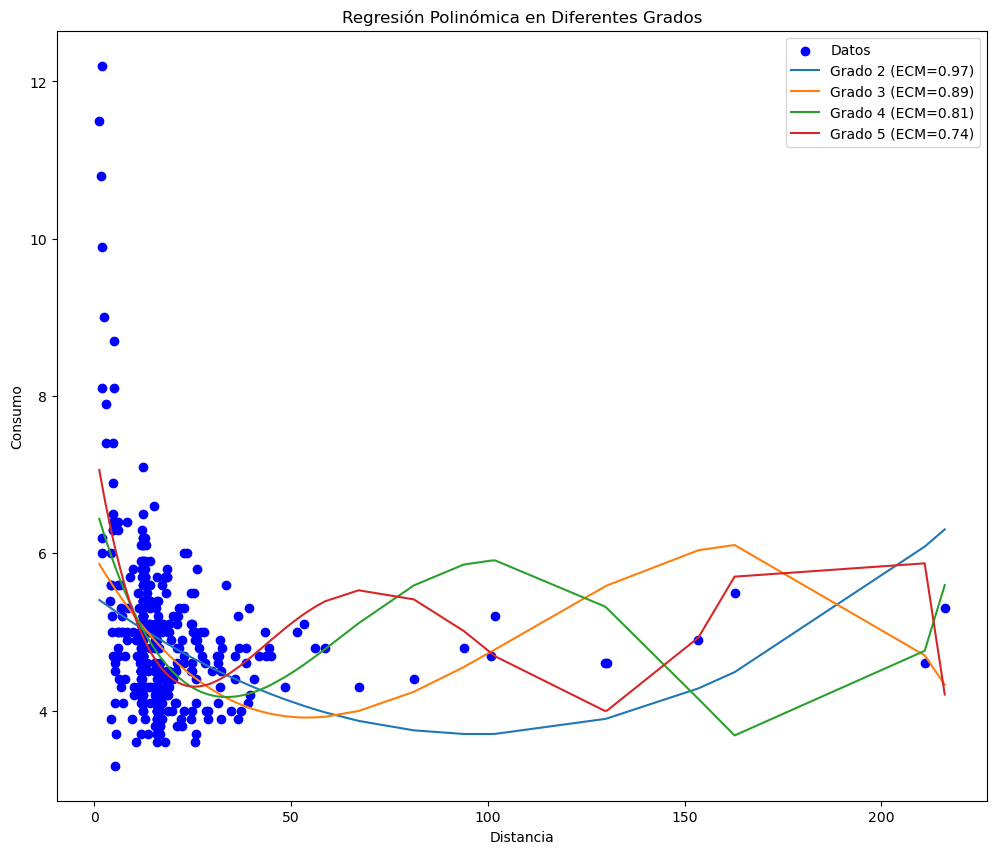

Errores Cuadráticos Medios (ECM) para cada grado:
Grado 2: ECM = 0.97
Grado 3: ECM = 0.89
Grado 4: ECM = 0.81
Grado 5: ECM = 0.74


In [9]:
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

X = df_copy[['distance']].values
y = df_copy['consume'].values
linear_model = LinearRegression()
linear_model.fit(X, y)
y_pred = linear_model.predict(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x='distance', y='consume', data=df_copy, label='Datos')
plt.plot(df_copy['distance'], y_pred, color='red', label='Regresión Lineal')
plt.title('Regresión Lineal de Consumo en función de Distancia')
plt.xlabel('Distancia')
plt.ylabel('Consumo')
plt.legend()
plt.show()

grados = [2, 3, 4, 5]
valores_mse = []

plt.figure(figsize=(12, 10))
plt.scatter(df_copy['distance'], df_copy['consume'], color='blue', label='Datos')

for grado in grados:
    poly_features = PolynomialFeatures(degree=grado)
    X_poly = poly_features.fit_transform(X)
    
    modelo_poli = LinearRegression()
    modelo_poli.fit(X_poly, y)
    y_poly_pred = modelo_poli.predict(X_poly)
    
    mse = mean_squared_error(y, y_poly_pred)
    valores_mse.append(mse)
    
    idx_ordenado = np.argsort(df_copy['distance'])
    plt.plot(df_copy['distance'].values[idx_ordenado], y_poly_pred[idx_ordenado], label=f'Grado {grado} (ECM={mse:.2f})')

plt.xlabel('Distancia')
plt.ylabel('Consumo')
plt.title('Regresión Polinómica en Diferentes Grados')
plt.legend()
plt.show()

print("Errores Cuadráticos Medios (ECM) para cada grado:")
for grado, mse in zip(grados, valores_mse):
    print(f"Grado {grado}: ECM = {mse:.2f}")

Como respuesta a la pregunta : ¿Qué observa en el error cuadrático medio y en la forma de las
predicciones a medida que aumenta el grado del polinomio?

R. A medida que aumenta el polinomio, el ECM disminuye, indicando que dicho modelo se ajusta mejor a nuestros datos, por lo cual los modelos polinomiales de mayor grado logran capturar de mejor manera la variabilidad en los datos. 

2.3 Función para generar los datos

In [10]:
def generar_datos(n_datos):
    x = np.random.uniform(0, 3, n_datos)  # Variable independiente
    y = 5 + 2 * x + np.random.uniform(2, 4, n_datos)  # Variable dependiente
    return x, y

Función para graficar datos simulados

In [11]:
def graficar_datos(x, y, titulo="Scatter Plot de los Datos", guardar=False):
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='b', alpha=0.6)
    plt.title(titulo, fontsize=15)
    plt.xlabel("Variable Independiente (x)", fontsize=12)
    plt.ylabel("Variable Dependiente (y)", fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(True)
    if guardar:
        plt.savefig(f"{titulo}.png")
        files.download(f"{titulo}.png")
    plt.show()

 Función para ajustar regresión lineal

In [12]:
def calcular_regresion_lineal(x, y):
    X = np.vstack((np.ones(len(x)), x)).T  # Matriz de diseño con columna de 1s
    y = y.reshape(-1, 1)
    # Calculando los parámetros con la fórmula de solución cerrada (theta = (X^T * X)^-1 * X^T * y)
    theta = np.linalg.inv(X.T @ X) @ X.T @ y
    return theta.flatten()

Función para graficar la regresión ajustada

In [13]:
def graficar_regresion(x, y, parametros):
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='b', alpha=0.6, label="Datos Simulados")
    y_pred = parametros[0] + parametros[1] * x
    plt.plot(x, y_pred, color='r', linewidth=2, label="Recta Ajustada")
    plt.title("Regresión Lineal - Ajuste a los Datos", fontsize=15)
    plt.xlabel("Variable Independiente (x)", fontsize=12)
    plt.ylabel("Variable Dependiente (y)", fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend()
    plt.grid(True)
    plt.show()

Clase de regresión lineal

In [14]:
class regressionLineal:
    def __init__(self, tipo_datos, n_datos):
        self.tipo_datos = tipo_datos
        self.n_datos = n_datos
        self.x, self.y = generar_datos(n_datos)
        self.parametros = None

    def visualizar_datos(self, guardar=False):
        graficar_datos(self.x, self.y, guardar=guardar)

    def ajustar_regresion(self):
        self.parametros = calcular_regresion_lineal(self.x, self.y)
        return self.parametros

    def visualizar_regresion(self):
        if self.parametros is None:
            print("Primero necesita ajustar la regresión.")
        else:
            graficar_regresion(self.x, self.y, self.parametros)

Función para cargar la base de datos measurements.csv

In [15]:
def cargar_datos_csv(filepath):
    df = pd.read_csv(filepath)
    df.columns = df.columns.str.strip()  # Eliminar espacios en los nombres de las columnas
    # Convertir columnas con comas a punto flotante
    df['distance'] = df['distance'].str.replace(',', '.').astype(float)
    df['consume'] = df['consume'].str.replace(',', '.').astype(float)
    return df

Función para graficar datos del CSV

In [16]:
def graficar_datos_csv(df, x_col, y_col):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df[x_col], y=df[y_col], alpha=0.6)
    plt.title("Scatter Plot de Datos del CSV", fontsize=15)
    plt.xlabel(x_col, fontsize=12)
    plt.ylabel(y_col, fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(True)
    plt.show()

Función para ajustar y graficar regresión polinomial

In [17]:
def ajustar_regresion_polinomial(x, y, grado):
    poly = PolynomialFeatures(degree=grado)
    X_poly = poly.fit_transform(x.reshape(-1, 1))
    modelo = LinearRegression()
    modelo.fit(X_poly, y)
    y_pred = modelo.predict(X_poly)
    return modelo, y_pred, mean_squared_error(y, y_pred)

Función para graficar regresión polinomial

In [18]:
def graficar_regresion_polinomial(x, y, y_pred, grado):
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='b', alpha=0.6, label="Datos Reales")
    plt.plot(np.sort(x), y_pred[np.argsort(x)], color='r', linewidth=2, label=f"Regresión Polinomial Grado {grado}")
    plt.title(f"Regresión Polinomial de Grado {grado}", fontsize=15)
    plt.xlabel("Variable Independiente (x)", fontsize=12)
    plt.ylabel("Variable Dependiente (y)", fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend()
    plt.grid(True)
    plt.show()

Función para ajustar regresión con penalización (Ridge y Lasso)

In [19]:
def ajustar_regresion_penalizada(x_train, y_train, x_test, y_test, grado, alpha, modelo_tipo="ridge"):
    poly = PolynomialFeatures(degree=grado)
    X_train_poly = poly.fit_transform(x_train.reshape(-1, 1))
    X_test_poly = poly.transform(x_test.reshape(-1, 1))

    if modelo_tipo == "ridge":
        modelo = Ridge(alpha=alpha)
    elif modelo_tipo == "lasso":
        modelo = Lasso(alpha=alpha)
    else:
        raise ValueError("Tipo de modelo no soportado. Use 'ridge' o 'lasso'.")

    modelo.fit(X_train_poly, y_train)
    y_pred = modelo.predict(X_test_poly)
    mse = mean_squared_error(y_test, y_pred)
    return modelo, y_pred, mse

Ejemplo de uso de la clase y funciones
Cargar datos del CSV y graficar

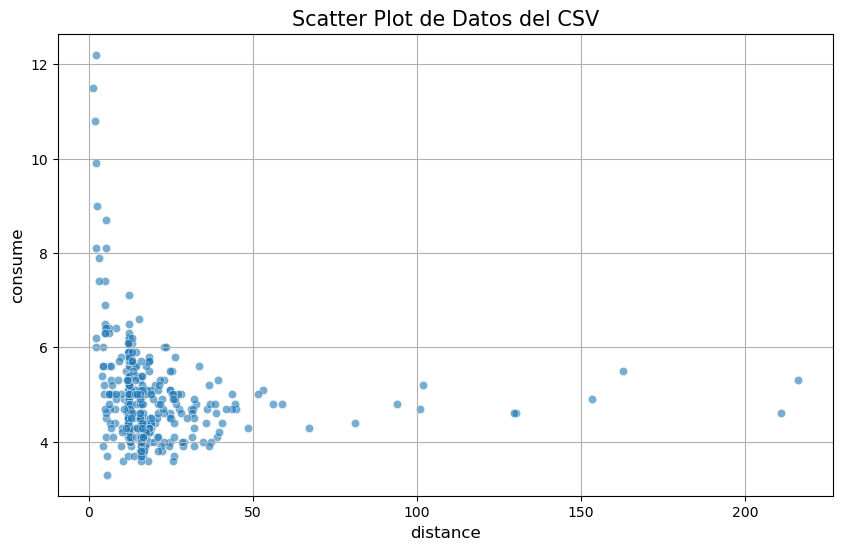

In [21]:
df = cargar_datos_csv('measurements.csv')
graficar_datos_csv(df, 'distance', 'consume')


Separar los datos en entrenamiento y prueba (80%-20%)

In [24]:
x = df['distance'].values
y = df['consume'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Ajustar regresión polinomial de grado mayor a 5 y graficar

In [25]:
grado_polinomio = 6
modelo_polinomial, y_pred_train, mse_train = ajustar_regresion_polinomial(x_train, y_train, grado_polinomio)
print(f"Error Cuadrático Medio en entrenamiento para grado {grado_polinomio}: {mse_train}")

grados = [6]
alphas = [0.1, 1, 10]


Error Cuadrático Medio en entrenamiento para grado 6: 0.7084304515355755


Ajustar y graficar regresión Ridge y Lasso con diferentes alphas

c:\Users\user\anaconda3\envs\curso_ciencias_de_datos\lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.29503e-30): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Error Cuadrático Medio (Ridge) para grado 6 y alpha 0.1: 0.7130854971126362


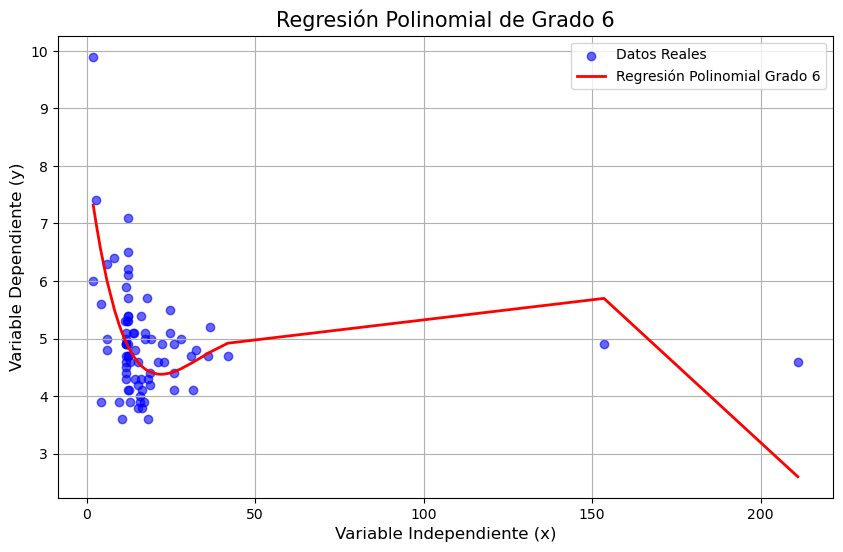

c:\Users\user\anaconda3\envs\curso_ciencias_de_datos\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.389e+02, tolerance: 3.423e-02
  model = cd_fast.enet_coordinate_descent(


Error Cuadrático Medio (Lasso) para grado 6 y alpha 0.1: 0.7461596246394813


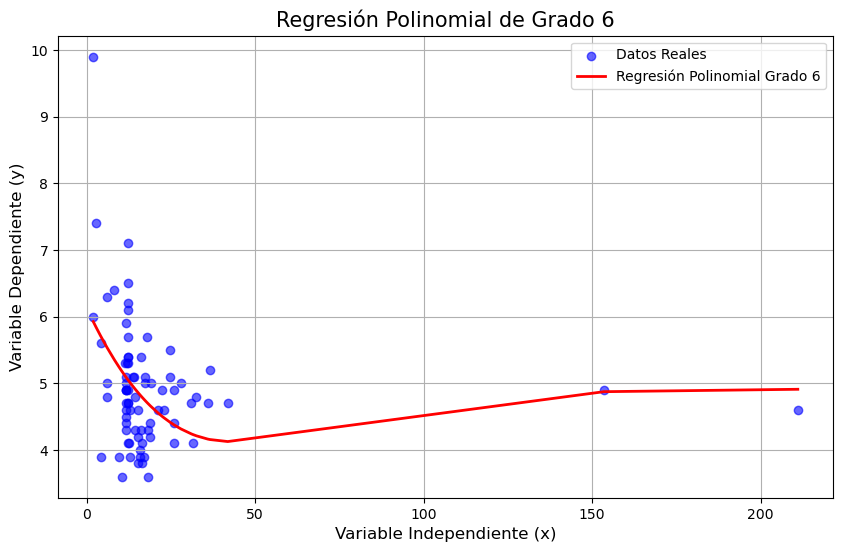

c:\Users\user\anaconda3\envs\curso_ciencias_de_datos\lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.29503e-29): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Error Cuadrático Medio (Ridge) para grado 6 y alpha 1: 0.7119297217150977


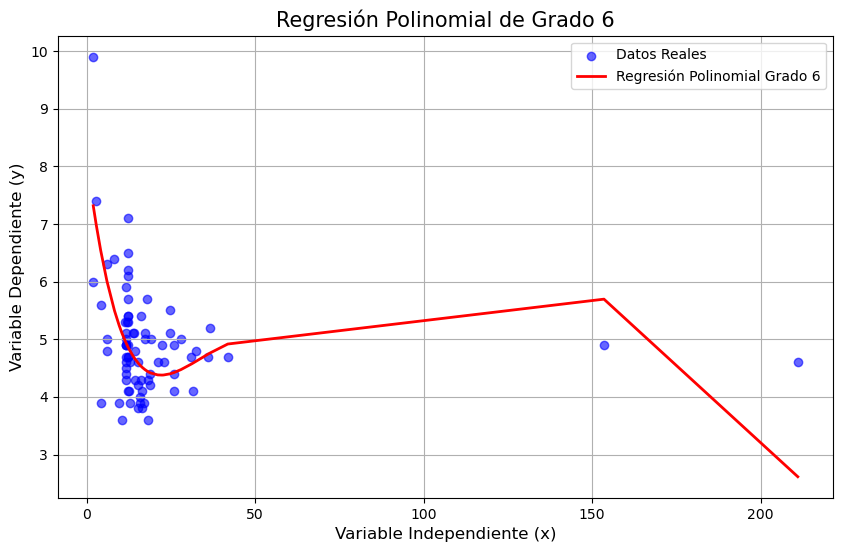

c:\Users\user\anaconda3\envs\curso_ciencias_de_datos\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.623e+02, tolerance: 3.423e-02
  model = cd_fast.enet_coordinate_descent(


Error Cuadrático Medio (Lasso) para grado 6 y alpha 1: 0.8085529254744627


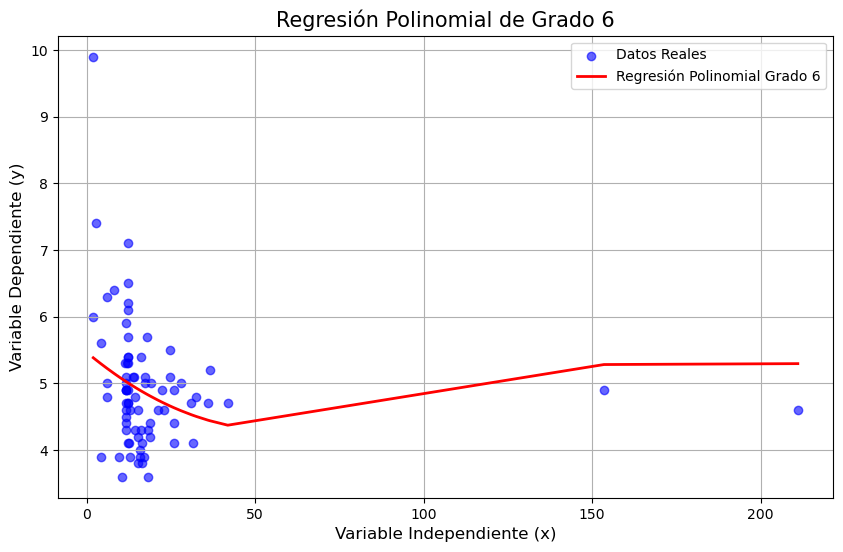

c:\Users\user\anaconda3\envs\curso_ciencias_de_datos\lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.29503e-28): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Error Cuadrático Medio (Ridge) para grado 6 y alpha 10: 0.7013084776357411


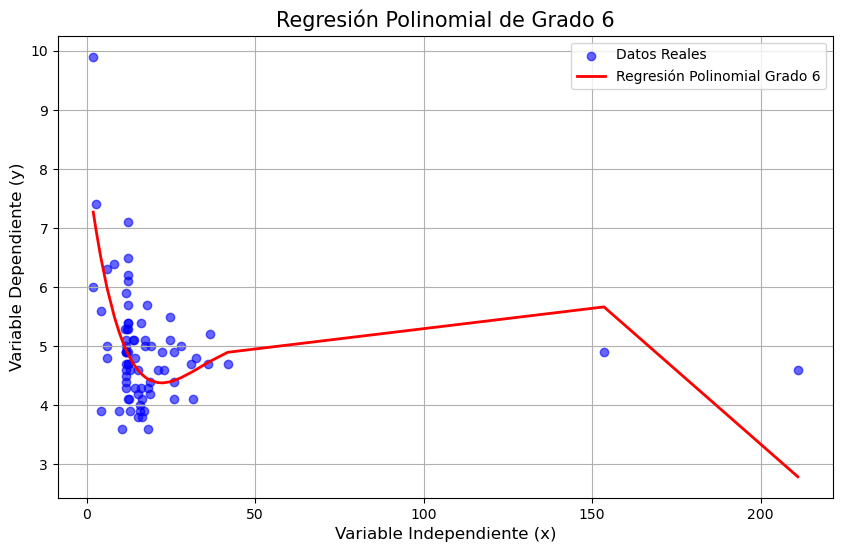

Error Cuadrático Medio (Lasso) para grado 6 y alpha 10: 0.8900414689269346


c:\Users\user\anaconda3\envs\curso_ciencias_de_datos\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.660e+02, tolerance: 3.423e-02
  model = cd_fast.enet_coordinate_descent(


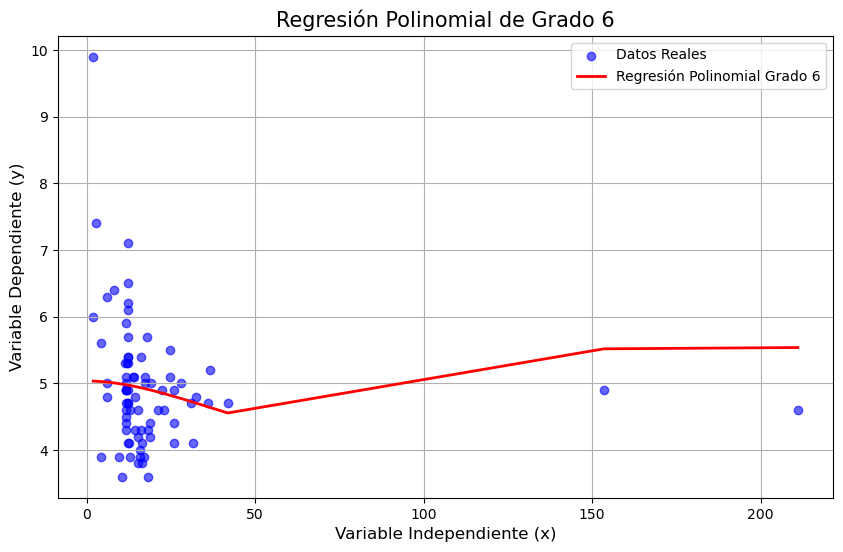

In [ ]:
for grado in grados:
    for alpha in alphas:
        # Ridge
        modelo_ridge, y_pred_ridge, mse_ridge = ajustar_regresion_penalizada(x_train, y_train, x_test, y_test, grado, alpha, modelo_tipo="ridge")
        print(f"Error Cuadrático Medio (Ridge) para grado {grado} y alpha {alpha}: {mse_ridge}")
        graficar_regresion_polinomial(x_test, y_test, y_pred_ridge, grado)

        # Lasso
        modelo_lasso, y_pred_lasso, mse_lasso = ajustar_regresion_penalizada(x_train, y_train, x_test, y_test, grado, alpha, modelo_tipo="lasso")
        print(f"Error Cuadrático Medio (Lasso) para grado {grado} y alpha {alpha}: {mse_lasso}")
        graficar_regresion_polinomial(x_test, y_test, y_pred_lasso, grado)
